# Scikit-Learn Practice Exercises

This notebook offers a set of exercises for different tasks with Scikit-Learn.

In [2]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline
# Import the pyplot module of matplotlib as plt
import matplotlib.pyplot as plt
# Import pandas under the abbr of "pd"
import pandas as pd
# Import numpy under the abbr of "np"
import numpy as np

## End-to-end Scikit-Learn Classification workflow

Let's start with an end-to-end Scikit-learn workflow

More specifically we'll,

1. Get a dataset ready
2. Prepare a machine learning model to make predictions
3. Fit the model to the data and make a prediction
4. Evaluate the model's predictions

The data we'll be using is in repo. We'll start with `heart-disease.csv`, a dataset which contains anonymous patient data and whether or not they have heart disease.

### 1. Getting a dataset ready

In [3]:
# import the heart disease dataset and save it to a variable
heart_disease = pd.read_csv("heart-disease.csv")

# check the first 5 rows of the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Our goal here is to build a machine learning model on all of the columns except `target` to predict `target`.

In essence, the `target` column is our **target variable**(also called `y` or `labels`) and the rest of the other columns are our independent variables (also called `data` or `X`)

And since our target variable is one thing or another (heart disease or not), we know our problem is a classification problem(classifying whether something is one thing or another).

Knowing this, let's create `X` and `y` by splitting our dataframe up.

In [4]:
# Create X (all columns except target)
X = heart_disease.drop("target", axis=1)

# Create y (only the target column)
y = heart_disease["target"]

Now we've split our data into `X` and `y`, we'll use Scikit-learn to split it into training and test sets.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
# View the different shapes of the training and test datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

Since our data is now ready and splitted into training and test sets, we'll build a machine learning model to fit patterns in the training data and then make predictions using test data.

To choose which estimator we'll use, We can go through Scikit-learn's machine learning map.

After following the map, we decided to use the `RandomForestClassifier`

### 2. Picking a machine learning model

In [23]:
# import RandomForestClassifer
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier
clf = RandomForestClassifier()

Now we've got a `RandomForestClassifier` instance, let's fit it to the training data.

Once it's fit, we'll make predictions on the test data.

### 3. Fitting a model and making predictions

In [25]:
# fit the RandomForestClassifier with the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
# Use the fitted model to make predictions on the test data and save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

### 4. Evaluating a model's predictions

Evaluating predictions is as important making them. Let's check how our model did by calling the `score()` method on it and passing it the training (`X_train`,`y_train`) and testing data(`X_test`,`y_test`)

In [28]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

1.0

In [29]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test,y_test)

0.8852459016393442

## Experimenting with different classification models

For this exercise, the models we're going to try and compare are:
* LinearSVC
* KNeighborsClassifier(Also known as K-Nearest Neighbors or KNN)
* SVC(also known as support vector classifier, a form of support vector machine)
* LogisticRegression(despite the name, this is actually a classifier)
* RandomForestClassifier(an ensemble method and what we used above)

We'll follow the same workflow we used above (except this time for multiple models):
1. Import a machine learning model
2. Get it ready
3. Fit it to the data and make predictions
4. Evaluate the fitted model

**Note**: Since we've already got the data ready, we can reuse it in this section.

In [31]:
# Import LinearSVC
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import SVC
from sklearn.svm import SVC

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# RandomForestClassfier is already imported

Thanks to the consistency of Scikit-Learn's API design, we can use virtually the same code to fit, score and make predictions with each of our model.

To see which model performs best, we'll do the following:

1. Instantiate each model into a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check results

In [40]:
np.random.seed(42)

# Instantiate each model into a dictionary
model_dict = {"RandomForestClassifier":RandomForestClassifier(), 
              "LinearSVC":LinearSVC(),
              "KNeighborsClassifier":KNeighborsClassifier(),
              "SVC":SVC(),
              "LogisticRegression":LogisticRegression()}

# Create an empty results dictionary
results_dict = dict()

for model_name, model in model_dict.items():
    # Fit each model on the training data
    model.fit(X_train, y_train)
    # Score each model on the test data
    results_dict[model_name] = model.score(X_test, y_test)

# check results
results_dict

/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.9016393442622951,
 'LinearSVC': 0.8360655737704918,
 'KNeighborsClassifier': 0.6557377049180327,
 'SVC': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442}

Let's make our results more visual.

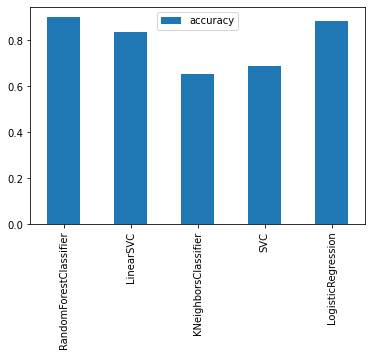

In [44]:
# Create a pandas dataframe with the data as the values of the results dictionary, 
# the index as the keys of the results dictionary and a single column called accuracy
# Be sure to save the dataframe to a variable
results_df = pd.DataFrame(data=results_dict.values(), index=results_dict.keys(), columns=["accuracy"])

results_df.plot.bar();

Let's tune the hyperparameters and see if can improve it.

## Hyperparameter Tuning